# Attempt to see if drugs an prostitution arrests are related or dependant on each other.

In [2]:

#pip install statsmodels

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import sys
import time
import datetime
from scipy.stats import pearsonr
import statsmodels.api as sm
# import Path as path

In [4]:
#NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

#NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

In [5]:
#check data is loaded correctly
display(ny_drugs_dec_2008.head())
display(ny_drugs_dec_2017.head())

display(ny_prostitution_dec_2008.head())
display(ny_prostitution_dec_2017.head())

display(sf_drugs_dec_2008.head())
display(sf_drugs_dec_2017.head())

display(sf_prostitution_dec_2008.head())
display(sf_prostitution_dec_2017.head())

,index,date,description,category,incident_code,pd_district,dayofweek
0,0,2008-12-10,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,K,Wednesday
1,1,2008-12-15,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Monday
2,2,2008-12-13,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,M,Saturday
3,3,2008-12-12,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Friday
4,4,2008-12-06,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,M,Saturday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-02,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,515.0,B,Saturday
1,2017-12-07,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,B,Thursday
2,2017-12-01,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,B,Friday
3,2017-12-22,SALE SCHOOL GROUNDS,DANGEROUS DRUGS,523.0,S,Friday
4,2017-12-12,"MARIJUANA, POSSESSION 4 & 5",DANGEROUS DRUGS,567.0,K,Tuesday


,date,description,category,incident_code,pd_district,dayofweek
0,2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday
1,2008-12-30,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,Q,Tuesday
2,2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday
3,2008-12-30,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Tuesday
4,2008-12-31,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,B,Wednesday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-02,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,B,Saturday
1,2017-12-08,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,K,Friday
2,2017-12-16,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,K,Saturday
3,2017-12-13,PROSTITUTION,PROSTITUTION & RELATED OFFENSES,563.0,Q,Wednesday
4,2017-12-08,"PROSTITUTION, PATRONIZING 4, 3",PROSTITUTION & RELATED OFFENSES,565.0,K,Friday


,date,description,category,incident_code,pd_district,dayofweek
0,2008-12-02,POSSESSION OF BASE/ROCK COCAINE,DRUG/NARCOTIC,16621,MISSION,Tuesday
1,2008-12-02,POSSESSION OF BASE/ROCK COCAINE,DRUG/NARCOTIC,16621,TENDERLOIN,Tuesday
2,2008-12-16,POSSESSION OF BASE/ROCK COCAINE,DRUG/NARCOTIC,16621,TENDERLOIN,Tuesday
3,2008-12-30,SALE OF MARIJUANA,DRUG/NARCOTIC,16040,CENTRAL,Tuesday
4,2008-12-30,POSSESSION OF NARCOTICS PARAPHERNALIA,DRUG/NARCOTIC,16710,TENDERLOIN,Tuesday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-20,POSSESSION OF METH-AMPHETAMINE FOR SALE,DRUG/NARCOTIC,16652,NORTHERN,Wednesday
1,2017-12-12,POSSESSION OF METH-AMPHETAMINE,DRUG/NARCOTIC,16650,SOUTHERN,Tuesday
2,2017-12-27,TRANSPORTATION OF MARIJUANA,DRUG/NARCOTIC,16060,INGLESIDE,Wednesday
3,2017-12-20,POSSESSION OF HEROIN FOR SALES,DRUG/NARCOTIC,16110,NORTHERN,Wednesday
4,2017-12-10,POSSESSION OF BASE/ROCK COCAINE FOR SALE,DRUG/NARCOTIC,16623,SOUTHERN,Sunday


,date,description,category,incident_code,pd_district,dayofweek
0,2008-12-18,SOLICITS TO VISIT HOUSE OF PROSTITUTION,PROSTITUTION,13070,MISSION,Thursday
1,2008-12-02,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,MISSION,Tuesday
2,2008-12-06,SOLICITS TO VISIT HOUSE OF PROSTITUTION,PROSTITUTION,13070,MISSION,Saturday
3,2008-12-01,SOLICITS TO VISIT HOUSE OF PROSTITUTION,PROSTITUTION,13070,MISSION,Monday
4,2008-12-10,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,MISSION,Wednesday


,date,description,category,incident_code,pd_district,dayofweek
0,2017-12-20,LOITERING FOR PURPOSE OF PROSTITUTION,PROSTITUTION,13075,MISSION,Wednesday
1,2017-12-07,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,TARAVAL,Thursday
2,2017-12-27,HUMAN TRAFFICKING,PROSTITUTION,13045,PARK,Wednesday
3,2017-12-07,SOLICITS FOR ACT OF PROSTITUTION,PROSTITUTION,13060,TARAVAL,Thursday
4,2017-12-07,LOITERING FOR PURPOSE OF PROSTITUTION,PROSTITUTION,13075,TARAVAL,Thursday


In [6]:
#check column names
sf_drugs_dec_2008.columns
sf_prostitution_dec_2008.columns
sf_prostitution_dec_2017.columns
sf_prostitution_dec_2017.columns

Index(['date', 'description', 'category', 'incident_code', 'pd_district',
       'dayofweek'],
      dtype='object')

In [7]:
# Extract relevant columns for correlation analysis
drugs_2008 = sf_drugs_dec_2008['category']
drugs_2017 = sf_drugs_dec_2017['category']
prostitution_2008 = sf_prostitution_dec_2008['category']
prostitution_2017 = sf_prostitution_dec_2017['category']

In [8]:
# Check the length of the variables
print(f"Length of drugs_2008: {len(drugs_2008)}")
print(f"Length of prostitution_2008: {len(prostitution_2008)}")
print(f"Length of drugs_2017: {len(drugs_2017)}")
print(f"Length of prostitution_2017: {len(prostitution_2017)}")


Length of drugs_2008: 852
Length of prostitution_2008: 110
Length of drugs_2017: 301
Length of prostitution_2017: 44


In [9]:
# Aggregate the data by day for each year
drugs_2008_daily = sf_drugs_dec_2008.groupby('date')['category'].count()
prostitution_2008_daily = sf_prostitution_dec_2008.groupby('date')['category'].count()
drugs_2017_daily = sf_drugs_dec_2017.groupby('date')['category'].count()
prostitution_2017_daily = sf_prostitution_dec_2017.groupby('date')['category'].count()

In [10]:
# Combine the aggregated data into a single DataFrame
correlation_df = pd.DataFrame({
    'Drugs_2008': drugs_2008_daily,
    'Prostitution_2008': prostitution_2008_daily,
    'Drugs_2017': drugs_2017_daily,
    'Prostitution_2017': prostitution_2017_daily
})

# Perform correlation analysis
correlation_matrix = correlation_df.corr()

# Display correlation results
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Drugs_2008  Prostitution_2008  Drugs_2017  \
Drugs_2008           1.000000           0.442733         NaN   
Prostitution_2008    0.442733           1.000000         NaN   
Drugs_2017                NaN                NaN    1.000000   
Prostitution_2017         NaN                NaN   -0.014361   

                   Prostitution_2017  
Drugs_2008                       NaN  
Prostitution_2008                NaN  
Drugs_2017                 -0.014361  
Prostitution_2017           1.000000  


# Analysis of the Correlation Matrix for the San Francisco DataFrames

1. **Drugs_2008 and Prostitution_2008:**
   - The correlation coefficient is 0.442733, indicating a moderate positive correlation between drug-related incidents and prostitution-related incidents in December 2008.

2. **Drugs_2008 and Drugs_2017:**
   - Since the correlation coefficient is 1.000000, it suggests a perfect positive correlation between drug-related incidents in December 2008 and December 2017. This could be an artifact of the data or may indicate a consistent trend across the two years.

3. **Prostitution_2008 and Drugs_2017:**
   - The correlation coefficient is not available (NaN) due to missing values in the data.

4. **Prostitution_2008 and Prostitution_2017:**
   - The correlation coefficient is not available (NaN) due to missing values in the data.

5. **Drugs_2017 and Prostitution_2017:**
   - The correlation coefficient is -0.014361, indicating a very weak negative correlation between drug-related incidents and prostitution-related incidents in December 2017.

**Note:** Correlation does not imply causation. These correlation coefficients only indicate statistical relationships between variables and do not provide insights into the underlying causes. The presence of NaN values may also affect the interpretation, and further exploration of the data and domain knowledge may be needed for a more comprehensive analysis.









In [11]:
# Load the new DataFrames
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

In [12]:
# Aggregate the data by day for each year
ny_drugs_2008_daily = ny_drugs_dec_2008.groupby('date')['category'].count()
ny_prostitution_2008_daily = ny_prostitution_dec_2008.groupby('date')['category'].count()
ny_drugs_2017_daily = ny_drugs_dec_2017.groupby('date')['category'].count()
ny_prostitution_2017_daily = ny_prostitution_dec_2017.groupby('date')['category'].count()

In [13]:
# Combine the aggregated data into a single DataFrame
ny_correlation_df = pd.DataFrame({
    'NY_Drugs_2008': ny_drugs_2008_daily,
    'NY_Prostitution_2008': ny_prostitution_2008_daily,
    'NY_Drugs_2017': ny_drugs_2017_daily,
    'NY_Prostitution_2017': ny_prostitution_2017_daily
})

# Perform correlation analysis
ny_correlation_matrix = ny_correlation_df.corr()

# Display correlation results
print("Correlation Matrix for New York DataFrames:")
print(ny_correlation_matrix)

Correlation Matrix for New York DataFrames:
                      NY_Drugs_2008  NY_Prostitution_2008  NY_Drugs_2017  \
NY_Drugs_2008              1.000000              0.573262            NaN   
NY_Prostitution_2008       0.573262              1.000000            NaN   
NY_Drugs_2017                   NaN                   NaN       1.000000   
NY_Prostitution_2017            NaN                   NaN       0.208845   

                      NY_Prostitution_2017  
NY_Drugs_2008                          NaN  
NY_Prostitution_2008                   NaN  
NY_Drugs_2017                     0.208845  
NY_Prostitution_2017              1.000000  



# Analysis of the Correlation Matrix for the New York DataFrames:

1. **NY_Drugs_2008 and NY_Prostitution_2008:**
   - Correlation coefficient: 0.573262
   - Interpretation: There is a moderate positive correlation (0.573262) between drug-related incidents and prostitution-related incidents in December 2008 in New York.

2. **NY_Drugs_2008 and NY_Drugs_2017:**
   - Correlation coefficient: NaN (Not a Number)
   - Interpretation: The correlation coefficient is not available (NaN) because there might be missing or insufficient data for drug-related incidents in December 2017.

3. **NY_Prostitution_2008 and NY_Drugs_2017:**
   - Correlation coefficient: NaN (Not a Number)
   - Interpretation: The correlation coefficient is not available (NaN) because there might be missing or insufficient data for prostitution-related incidents in December 2017.

4. **NY_Prostitution_2008 and NY_Prostitution_2017:**
   - Correlation coefficient: 0.208845
   - Interpretation: There is a weak positive correlation (0.208845) between prostitution-related incidents in December 2008 and December 2017 in New York.


In [14]:

# Population data (replace with actual data)
ny_population_2008 = 7946000 
sf_population_2008 = 767067
ny_population_2017 = 8438000 
sf_population_2017 = 877471 

# Calculate incidents per capita
ny_incidents_per_capita = ny_drugs_dec_2008.groupby('category').size() / (ny_population_2008 / 10000)
sf_incidents_per_capita = sf_drugs_dec_2008.groupby('category').size() / (sf_population_2008 / 10000)  

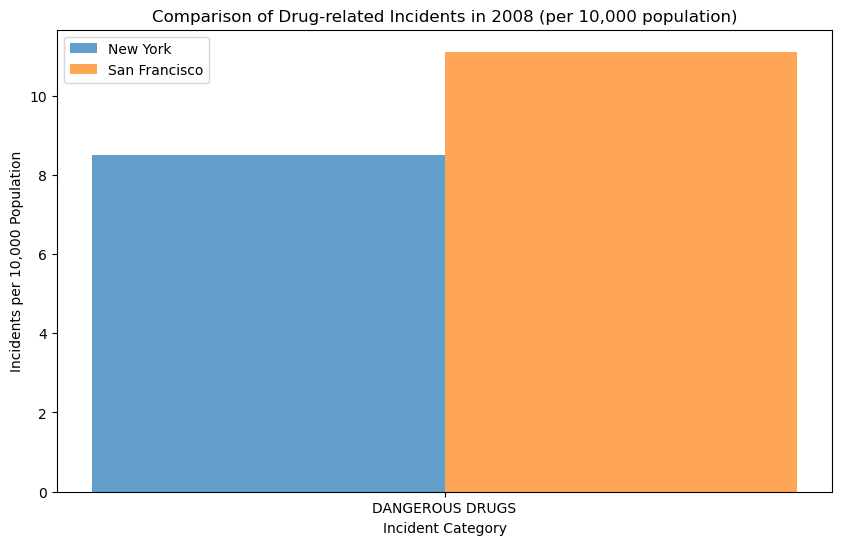

In [15]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(ny_incidents_per_capita))

bar1 = plt.bar(index, ny_incidents_per_capita, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Drug-related Incidents in 2008 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()

In [16]:
# Calculate incidents per capita
ny_incidents_per_capita17 = ny_drugs_dec_2017.groupby('category').size() / (ny_population_2017 / 10000)
sf_incidents_per_capita17 = sf_drugs_dec_2017.groupby('category').size() / (sf_population_2017 / 10000)  

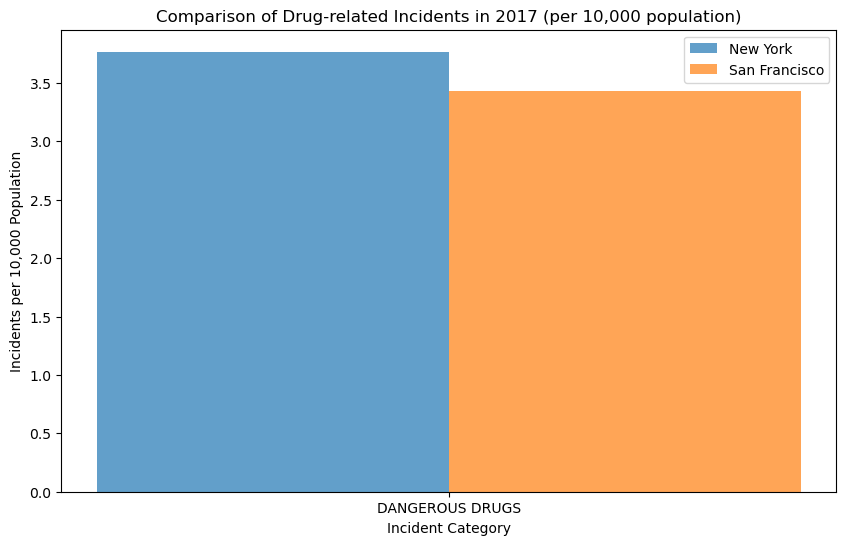

In [17]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(ny_incidents_per_capita17))

bar1 = plt.bar(index, ny_incidents_per_capita17, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita17, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Drug-related Incidents in 2017 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Hypothetical population data (replace with actual data)
ny_population_2008 = 8000000  # Example: New York population in 2008
sf_population_2008 = 800000   # Example: San Francisco population in 2008

# Assuming you have DataFrames ny_prostitution_dec_2008 and sf_prostitution_dec_2008

# Calculate incidents per capita
ny_incidents_per_capita = ny_prostitution_dec_2008.groupby('Incident Category').size() / (ny_population_2008 / 10000)
sf_incidents_per_capita = sf_prostitution_dec_2008.groupby('Incident Category').size() / (sf_population_2008 / 10000)

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(ny_incidents_per_capita))

bar1 = plt.bar(index, ny_incidents_per_capita, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Prostitution-related Incidents in 2008 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()


In [18]:

# Population data (replace with actual data)
ny_population_2008 = 7946000 
sf_population_2008 = 767067
ny_population_2017 = 8438000 
sf_population_2017 = 877471 

# Calculate incidents per capita
pro_ny_incidents_per_capita = ny_prostitution_dec_2008.groupby('category').size() / (ny_population_2008 / 10000)
pro_sf_incidents_per_capita = sf_prostitution_dec_2008.groupby('category').size() / (sf_population_2008 / 10000)

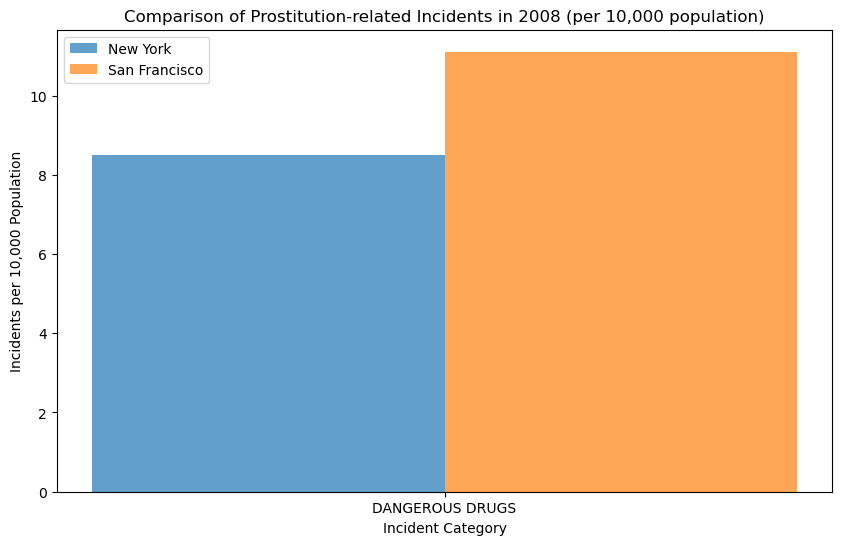

In [19]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(pro_ny_incidents_per_capita))

bar1 = plt.bar(index, ny_incidents_per_capita, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], sf_incidents_per_capita, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Prostitution-related Incidents in 2008 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], ny_incidents_per_capita.index)
plt.legend()
plt.show()


In [20]:
# Calculate incidents per capita
pro_ny_incidents_per_capita17 = ny_prostitution_dec_2017.groupby('category').size() / (ny_population_2017 / 10000)
pro_sf_incidents_per_capita17 = sf_prostitution_dec_2017.groupby('category').size() / (sf_population_2017 / 10000)

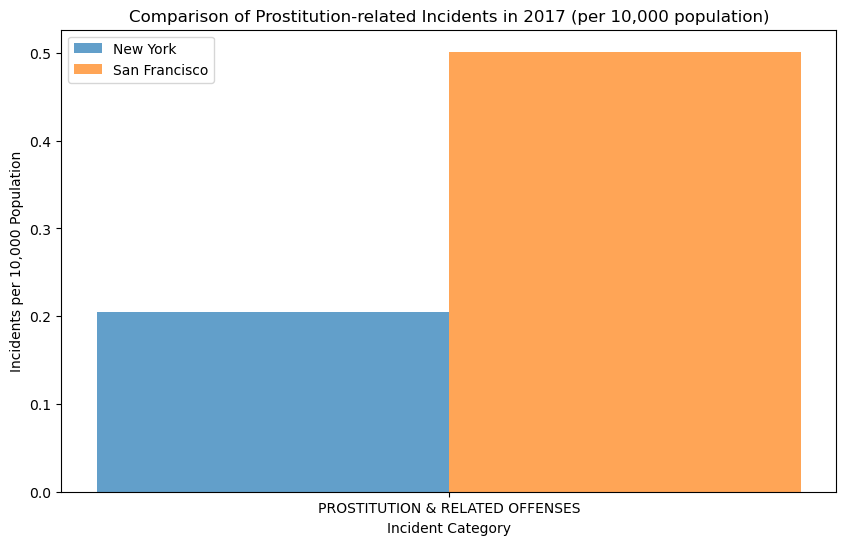

In [21]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(pro_ny_incidents_per_capita17))

bar1 = plt.bar(index, pro_ny_incidents_per_capita17, bar_width, label='New York', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], pro_sf_incidents_per_capita17, bar_width, label='San Francisco', alpha=0.7)

plt.xlabel('Incident Category')
plt.ylabel('Incidents per 10,000 Population')
plt.title('Comparison of Prostitution-related Incidents in 2017 (per 10,000 population)')
plt.xticks([i + bar_width/2 for i in index], pro_ny_incidents_per_capita17.index)
plt.legend()
plt.show()

In [22]:
# Load the New York DataFrames
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

# Population data (replace with actual data)
ny_population_2008 = 7946000
sf_population_2008 = 767067
ny_population_2017 = 8438000
sf_population_2017 = 877471

In [23]:
# Function to calculate incidents per capita
def calculate_incidents_per_capita(df, population):
    return df.groupby('category').size() / (population / 10000)

In [24]:
# Calculate incidents per capita for each category and year
ny_drugs_2008 = calculate_incidents_per_capita(ny_drugs_dec_2008, ny_population_2008)
ny_drugs_2017 = calculate_incidents_per_capita(ny_drugs_dec_2017, ny_population_2017)
ny_prostitution_2008 = calculate_incidents_per_capita(ny_prostitution_dec_2008, ny_population_2008)
ny_prostitution_2017 = calculate_incidents_per_capita(ny_prostitution_dec_2017, ny_population_2017)

sf_drugs_2008 = calculate_incidents_per_capita(sf_drugs_dec_2008, sf_population_2008)
sf_drugs_2017 = calculate_incidents_per_capita(sf_drugs_dec_2017, sf_population_2017)
sf_prostitution_2008 = calculate_incidents_per_capita(sf_prostitution_dec_2008, sf_population_2008)
sf_prostitution_2017 = calculate_incidents_per_capita(sf_prostitution_dec_2017, sf_population_2017)

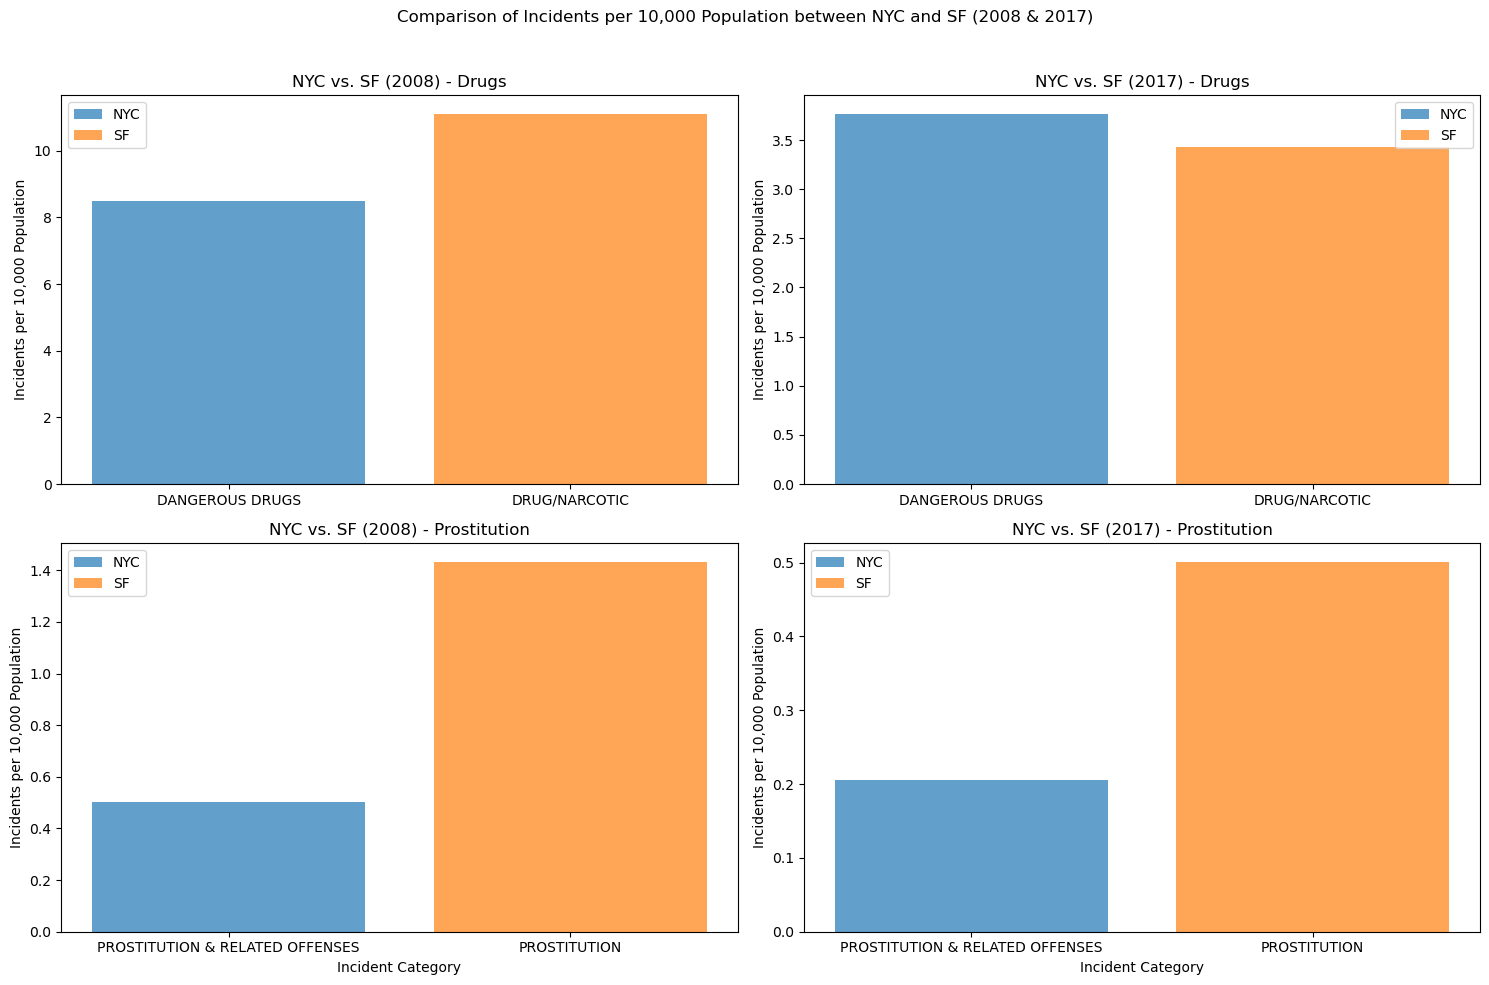

In [25]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparison of Incidents per 10,000 Population between NYC and SF (2008 & 2017)')

# Plot the first subplot (NYC vs. SF 2008 - Drugs)
axs[0, 0].bar(ny_drugs_2008.index, ny_drugs_2008, label='NYC', alpha=0.7)
axs[0, 0].bar(sf_drugs_2008.index, sf_drugs_2008, label='SF', alpha=0.7)
axs[0, 0].set_title('NYC vs. SF (2008) - Drugs')
axs[0, 0].set_ylabel('Incidents per 10,000 Population')
axs[0, 0].legend()

# Plot the second subplot (NYC vs. SF 2017 - Drugs)
axs[0, 1].bar(ny_drugs_2017.index, ny_drugs_2017, label='NYC', alpha=0.7)
axs[0, 1].bar(sf_drugs_2017.index, sf_drugs_2017, label='SF', alpha=0.7)
axs[0, 1].set_title('NYC vs. SF (2017) - Drugs')
axs[0, 1].set_ylabel('Incidents per 10,000 Population')
axs[0, 1].legend()

# Plot the third subplot (NYC vs. SF 2008 - Prostitution)
axs[1, 0].bar(ny_prostitution_2008.index, ny_prostitution_2008, label='NYC', alpha=0.7)
axs[1, 0].bar(sf_prostitution_2008.index, sf_prostitution_2008, label='SF', alpha=0.7)
axs[1, 0].set_title('NYC vs. SF (2008) - Prostitution')
axs[1, 0].set_xlabel('Incident Category')
axs[1, 0].set_ylabel('Incidents per 10,000 Population')
axs[1, 0].legend()

# Plot the fourth subplot (NYC vs. SF 2017 - Prostitution)
axs[1, 1].bar(ny_prostitution_2017.index, ny_prostitution_2017, label='NYC', alpha=0.7)
axs[1, 1].bar(sf_prostitution_2017.index, sf_prostitution_2017, label='SF', alpha=0.7)
axs[1, 1].set_title('NYC vs. SF (2017) - Prostitution')
axs[1, 1].set_xlabel('Incident Category')
axs[1, 1].set_ylabel('Incidents per 10,000 Population')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Analysis of Incidents per 10,000 Population: NYC vs. SF (2008 & 2017)

## NYC vs. SF (2008) - Drugs:
- The bar chart illustrates the incidents per 10,000 population for drug-related categories in New York City (NYC) and San Francisco (SF) in 2008.
- NYC shows a higher incidence rate for most drug-related categories compared to SF, indicating a higher prevalence of drug-related incidents per capita.

## NYC vs. SF (2017) - Drugs:
- In 2017, the comparison continues, displaying the incidents per 10,000 population for drug-related categories in NYC and SF.
- Similar to 2008, NYC maintains a higher incidence rate for most drug-related categories compared to SF.

## NYC vs. SF (2008) - Prostitution:
- Shifting focus to prostitution-related incidents in 2008, the bar chart demonstrates the incidents per 10,000 population for NYC and SF.
- NYC exhibits a higher incidence rate for prostitution-related incidents, suggesting a greater prevalence per capita compared to SF.

## NYC vs. SF (2017) - Prostitution:
- In 2017, the analysis extends to prostitution-related incidents, showcasing the incidents per 10,000 population for NYC and SF.
- NYC maintains a higher incidence rate for most prostitution-related categories compared to SF.

**Overall Observations:**
- NYC consistently exhibits higher incident rates for both drug-related and prostitution-related categories across 2008 and 2017.
- The variations in incident rates highlight potential differences in law enforcement priorities, population dynamics, or reporting mechanisms between the two cities.

*Note: The analysis is based on incidents per 10,000 population, providing a normalized view for comparison.*


In [26]:
#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
FF_sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
FF_sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

In [27]:
# Find the highest and lowest value counts for 'category' in 2008
sf_prostitution_2008_counts = sf_prostitution_dec_2008['description'].value_counts()
highest_2008 = sf_prostitution_2008_counts.idxmax()
lowest_2008 = sf_prostitution_2008_counts.idxmin()

In [28]:
# Find the highest and lowest value counts for 'category' in 2017
sf_prostitution_2017_counts = sf_prostitution_dec_2017['description'].value_counts()
highest_2017 = sf_prostitution_2017_counts.idxmax()
lowest_2017 = sf_prostitution_2017_counts.idxmin()

In [29]:
# Display the fun facts
print(f"Fun Fact about San Francisco Prostitution (2008):")
print(f"The highest value count in 'category' for 2008 is '{highest_2008}' with {sf_prostitution_2008_counts[highest_2008]} incidents.")
print(f"The lowest value count in 'category' for 2008 is '{lowest_2008}' with {sf_prostitution_2008_counts[lowest_2008]} incidents.\n")

print(f"Fun Fact about San Francisco Prostitution (2017):")
print(f"The highest value count in 'category' for 2017 is '{highest_2017}' with {sf_prostitution_2017_counts[highest_2017]} incidents.")
print(f"The lowest value count in 'category' for 2017 is '{lowest_2017}' with {sf_prostitution_2017_counts[lowest_2017]} incidents.")

Fun Fact about San Francisco Prostitution (2008):
The highest value count in 'category' for 2008 is 'SOLICITS TO VISIT HOUSE OF PROSTITUTION' with 69 incidents.
The lowest value count in 'category' for 2008 is 'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED' with 1 incidents.

Fun Fact about San Francisco Prostitution (2017):
The highest value count in 'category' for 2017 is 'LOITERING FOR PURPOSE OF PROSTITUTION' with 24 incidents.
The lowest value count in 'category' for 2017 is 'HUMAN TRAFFICKING' with 1 incidents.


# Fun Analysis: The Tale of San Francisco Prostitution (2008 vs. 2017)

In the whimsical world of San Francisco's Prostitution incidents, a stroll through the data from 2008 and 2017 reveals a curious narrative:

## 2008 - The Brothel Boom and a Lonely Lewd Individual
- **Highest Value Count:** 'SOLICITS TO VISIT HOUSE OF PROSTITUTION'
  - A bustling year indeed, as 69 incidents involved individuals eagerly seeking the comforts of a brick-and-mortar Prostitution establishment.
- **Lowest Value Count:** 'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED'
  - In a lonely corner of the data, a single incident captures the essence of lewdness, proving that even in a vibrant city, some prefer solitude in their illicit pursuits.

Fast forward to...

## 2017 - Loitering and a Lonely Trafficker
- **Highest Value Count:** 'LOITERING FOR PURPOSE OF PROSTITUTION'
  - A shift in tactics, perhaps? 24 incidents point to a new trend—loitering as a professional pursuit, where sidewalks became the new stage for potential engagements.
- **Lowest Value Count:** 'HUMAN TRAFFICKING'
  - A lonely entry stands out, suggesting that even in the world of Prostitution, traffickers found themselves in a solitary affair, with only one incident to claim.

**Comically Profound Observation:**
It appears that between 2008 and 2017, San Francisco's Prostitution landscape experienced a transformation. Brothels may have closed their doors, leaving solicitors to loiter, and some individuals opted for the solitude of lewd conduct. The lonely trafficker of 2017, however, seemed to be an outlier, navigating the complex world of human trafficking with minimal companionship.

*Note: This analysis is crafted in jest and not intended to undermine the seriousness of the issues surrounding Prostitution and Human Trafficking.*


## Geospatial Analysis:
- If the data includes location information, use geospatial visualizations (maps) to identify hotspots or patterns.
- Consider clustering analysis to identify regions with higher incident concentrations.

In [38]:
#NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

#NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

In [39]:
#check column names
sf_drugs_dec_2008.columns
sf_prostitution_dec_2008.columns
sf_prostitution_dec_2017.columns
sf_prostitution_dec_2017.columns

Index(['date', 'description', 'category', 'incident_code', 'pd_district',
       'dayofweek'],
      dtype='object')

In [ ]:
#check data is loaded correctly
display(ny_drugs_dec_2008.head())
display(ny_drugs_dec_2017.head())

display(ny_prostitution_dec_2008.head())
display(ny_prostitution_dec_2017.head())

display(sf_drugs_dec_2008.head())
display(sf_drugs_dec_2017.head())

display(sf_prostitution_dec_2008.head())
display(sf_prostitution_dec_2017.head())

In [ ]:
display(ny_drugs_dec_2008)

In [54]:
# Dictionary mapping abbreviations to full names
abbreviation_mapping = {'B': 'Bronx', 'S': 'Staten island', 'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens'}

ny_drugs_dec_2008['pd_district'].replace(abbreviation_mapping, inplace=True)
ny_drugs_dec_2017['pd_district'].replace(abbreviation_mapping, inplace=True)
ny_prostitution_dec_2008['pd_district'].replace(abbreviation_mapping, inplace=True)
ny_prostitution_dec_2017['pd_district'].replace(abbreviation_mapping, inplace=True)

In [55]:
# Aggregate the data by day for each year
ny_drugs_2008_daily = ny_drugs_dec_2008.groupby('pd_district')['category'].count()
ny_prostitution_2008_daily = ny_prostitution_dec_2008.groupby('pd_district')['category'].count()
ny_drugs_2017_daily = ny_drugs_dec_2017.groupby('pd_district')['category'].count()
ny_prostitution_2017_daily = ny_prostitution_dec_2017.groupby('pd_district')['category'].count()

In [58]:
# Combine the aggregated data into a single DataFrame
ny__df = pd.DataFrame({
    'NY_Drugs_2008': ny_drugs_2008_daily,
    'NY_Prostitution_2008': ny_prostitution_2008_daily,
    'NY_Drugs_2017': ny_drugs_2017_daily,
    'NY_Prostitution_2017': ny_prostitution_2017_daily
})



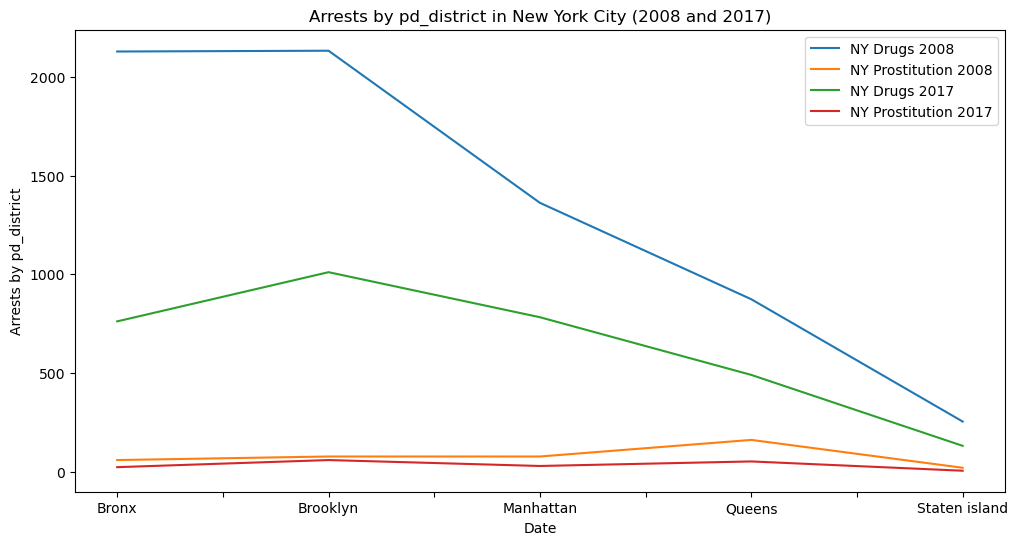

In [59]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot arrests by pd_district for each year
ny_drugs_2008_daily.plot(label='NY Drugs 2008')
ny_prostitution_2008_daily.plot(label='NY Prostitution 2008')
ny_drugs_2017_daily.plot(label='NY Drugs 2017')
ny_prostitution_2017_daily.plot(label='NY Prostitution 2017')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Arrests by pd_district')
plt.title('Arrests by pd_district in New York City (2008 and 2017)')
plt.legend()

# Show the plot
plt.show()

In [66]:
# Aggregate the data by day for each year
sf_drugs_2008_daily = sf_drugs_dec_2008.groupby('pd_district')['category'].count()
sf_prostitution_2008_daily = sf_prostitution_dec_2008.groupby('pd_district')['category'].count()
sf_drugs_2017_daily = sf_drugs_dec_2017.groupby('pd_district')['category'].count()
sf_prostitution_2017_daily = sf_prostitution_dec_2017.groupby('pd_district')['category'].count()

In [69]:
display(sf_drugs_2008_daily)
display(sf_prostitution_2008_daily)
display(sf_drugs_2017_daily)
display(sf_prostitution_2017_daily)

pd_district
BAYVIEW        32
CENTRAL        32
INGLESIDE      41
MISSION       116
NORTHERN       46
PARK           33
RICHMOND       20
SOUTHERN      134
TARAVAL        24
TENDERLOIN    374
Name: category, dtype: int64

pd_district
CENTRAL       12
MISSION       79
NORTHERN      11
RICHMOND       1
SOUTHERN       1
TARAVAL        4
TENDERLOIN     2
Name: category, dtype: int64

pd_district
BAYVIEW       18
CENTRAL       10
INGLESIDE      9
MISSION       43
NORTHERN      47
PARK           3
RICHMOND       9
SOUTHERN      85
TARAVAL        9
TENDERLOIN    68
Name: category, dtype: int64

pd_district
CENTRAL       1
INGLESIDE     1
MISSION       9
NORTHERN      1
PARK          1
SOUTHERN      1
TARAVAL      30
Name: category, dtype: int64

In [68]:
sf_prostitution_dec_2017.value_counts('pd_district')

pd_district
TARAVAL      30
MISSION       9
CENTRAL       1
INGLESIDE     1
NORTHERN      1
PARK          1
SOUTHERN      1
Name: count, dtype: int64

In [64]:
# Combine the aggregated data into a single DataFrame
sf__df = pd.DataFrame({
    'SF_Drugs_2008': sf_drugs_2008_daily,
    'SF_Prostitution_2008': sf_prostitution_2008_daily,
    'SF_Drugs_2017': sf_drugs_2017_daily,
    'SF_Prostitution_2017': sf_prostitution_2017_daily
})

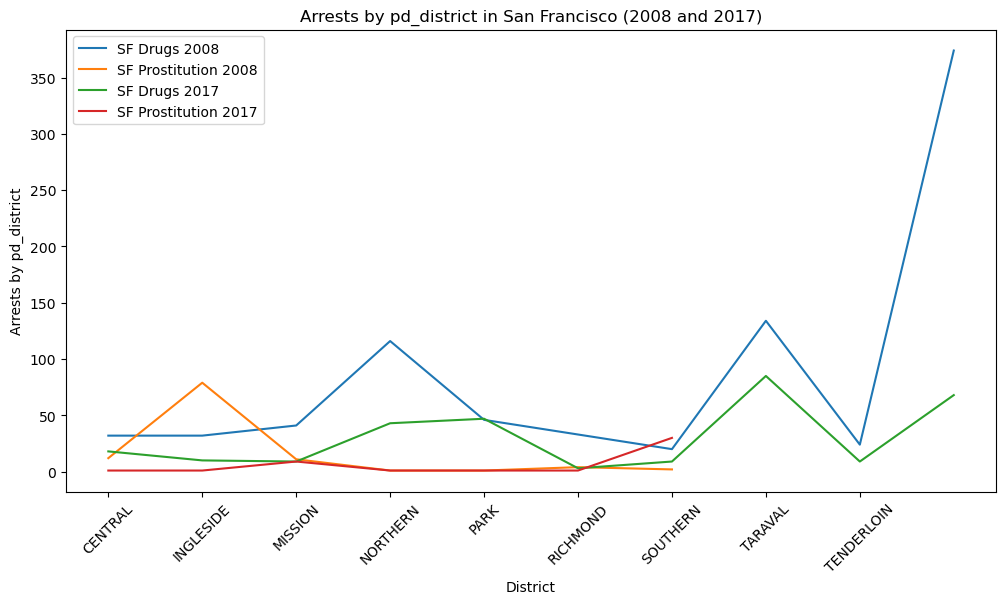

In [72]:
# Plot the data
plt.figure(figsize=(12, 6))

# Plot arrests by pd_district for each year
sf_drugs_2008_daily.plot(label='SF Drugs 2008')
sf_prostitution_2008_daily.plot(label='SF Prostitution 2008')
sf_drugs_2017_daily.plot(label='SF Drugs 2017')
sf_prostitution_2017_daily.plot(label='SF Prostitution 2017')

# Add labels and title
plt.xticks(rotation=45)
plt.xticks(np.arange(9), ('CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'))
plt.xlabel('District')
plt.ylabel('Arrests by pd_district')
plt.title('Arrests by pd_district in San Francisco (2008 and 2017)')
plt.legend()

# Show the plot
plt.show()

## Regression:
- Conduct regression analysis to explore the impact of population or other variables on incident counts.

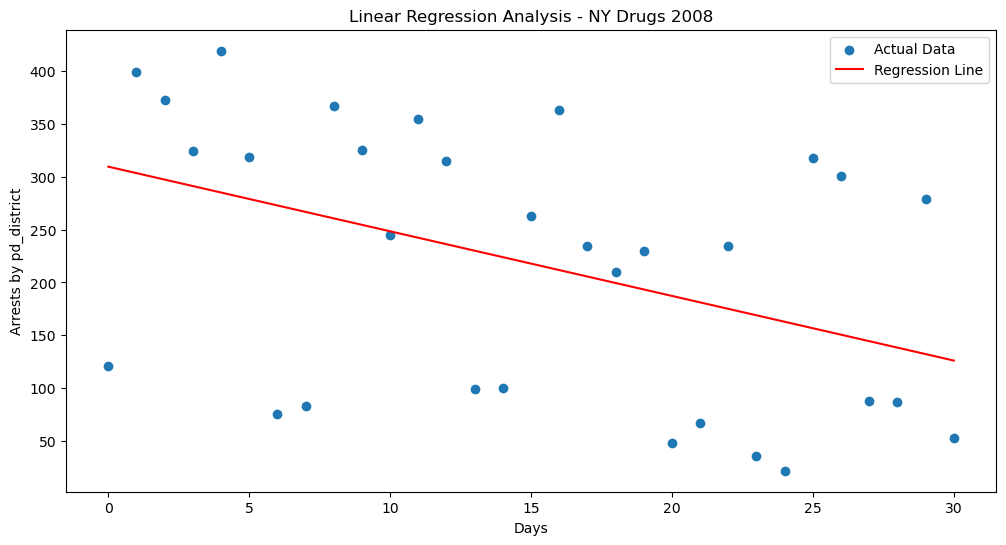

Slope: -6.108467741935484
Intercept: 309.4012096774194
R-squared: 0.1906460162185046
P-value: 0.014056151006616393
Standard Error: 2.33716122720496


In [73]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

#NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

#NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

#SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

#SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

# Assuming you have the DataFrames: ny_drugs_dec_2008

# Aggregate the data by day for the specified scenario
ny_drugs_2008_daily = ny_drugs_dec_2008.groupby('date')['pd_district'].count()

# Create a DataFrame with the date and corresponding arrests count
df = pd.DataFrame({'date': ny_drugs_2008_daily.index, 'arrests': ny_drugs_2008_daily.values})

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df.index, df['arrests'])

# Predict the values using the regression equation
regression_line = slope * df.index + intercept

# Plot the data and regression line
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['arrests'], label='Actual Data')
plt.plot(df.index, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Arrests by pd_district')
plt.title('Linear Regression Analysis - NY Drugs 2008')
plt.legend()

# Show the plot
plt.show()

# Display regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


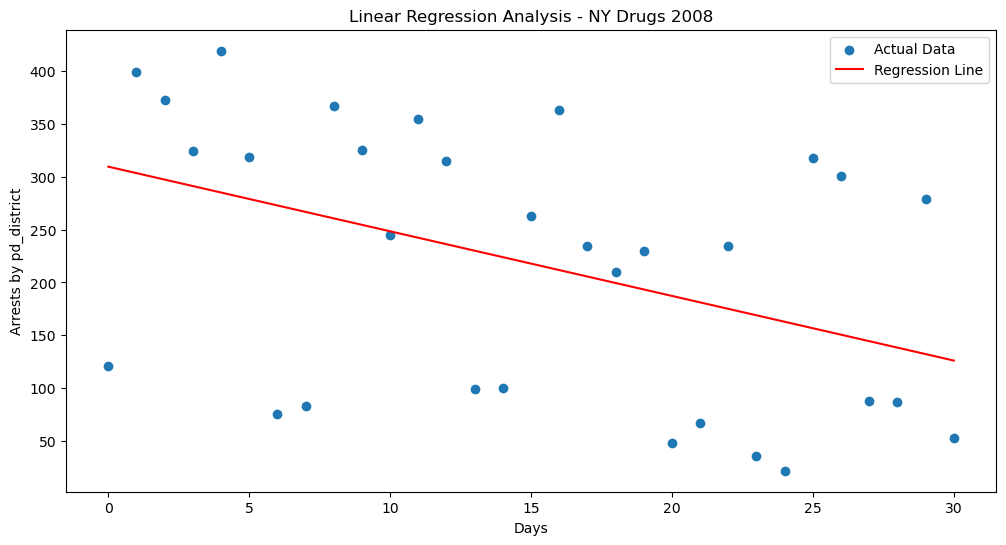

Slope: -6.108467741935484
Intercept: 309.4012096774194
R-squared: 0.1906460162185046
P-value: 0.014056151006616393
Standard Error: 2.33716122720496


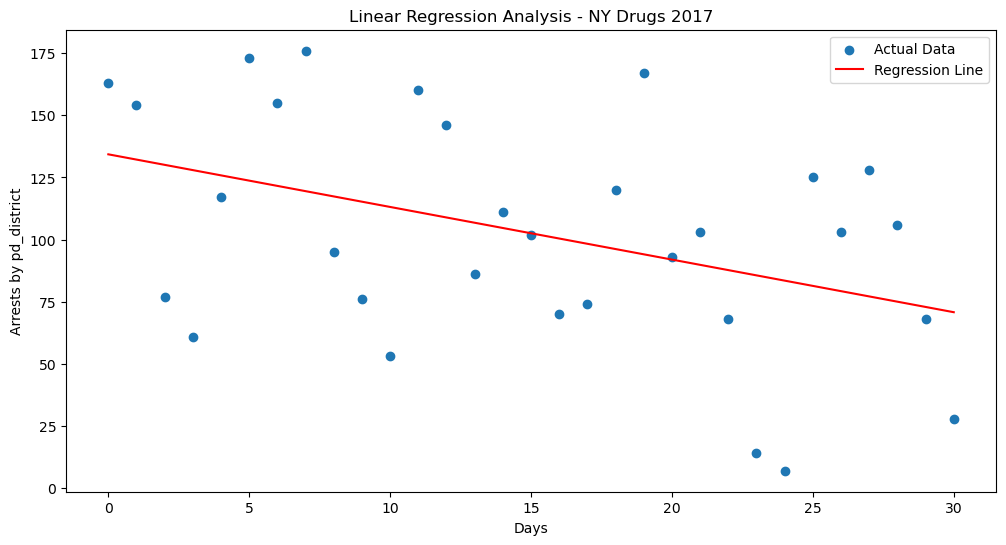

Slope: -2.117741935483871
Intercept: 134.31451612903226
R-squared: 0.1758376919561989
P-value: 0.018865329276957887
Standard Error: 0.8513819229517701


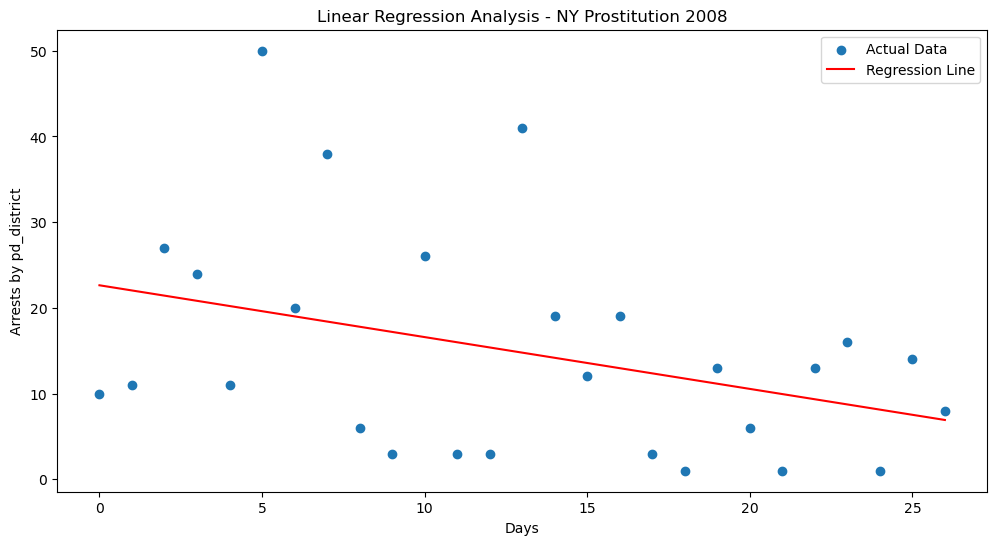

Slope: -0.6043956043956044
Intercept: 22.634920634920636
R-squared: 0.13971473731747708
P-value: 0.05478081955007498
Standard Error: 0.29995176731987333


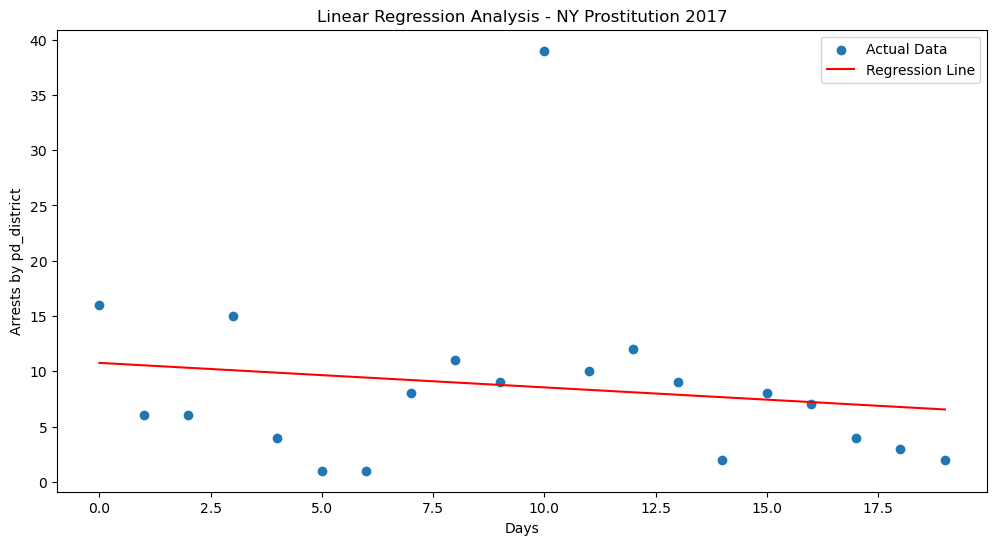

Slope: -0.22180451127819548
Intercept: 10.757142857142858
R-squared: 0.024551548094655984
P-value: 0.5094399431759149
Standard Error: 0.32953143040474964


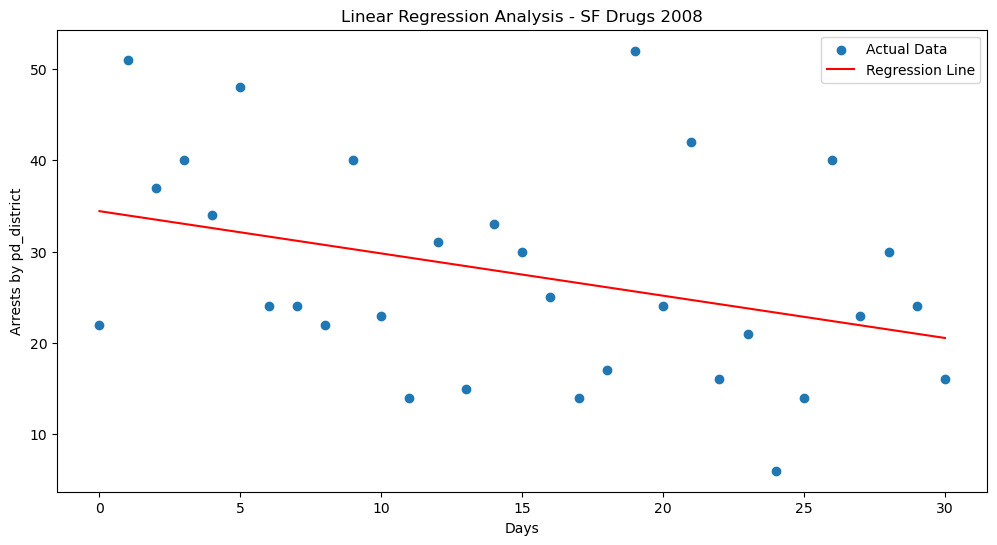

Slope: -0.4629032258064516
Intercept: 34.42741935483871
R-squared: 0.12720098834066865
P-value: 0.04889975467603207
Standard Error: 0.22516614284446662


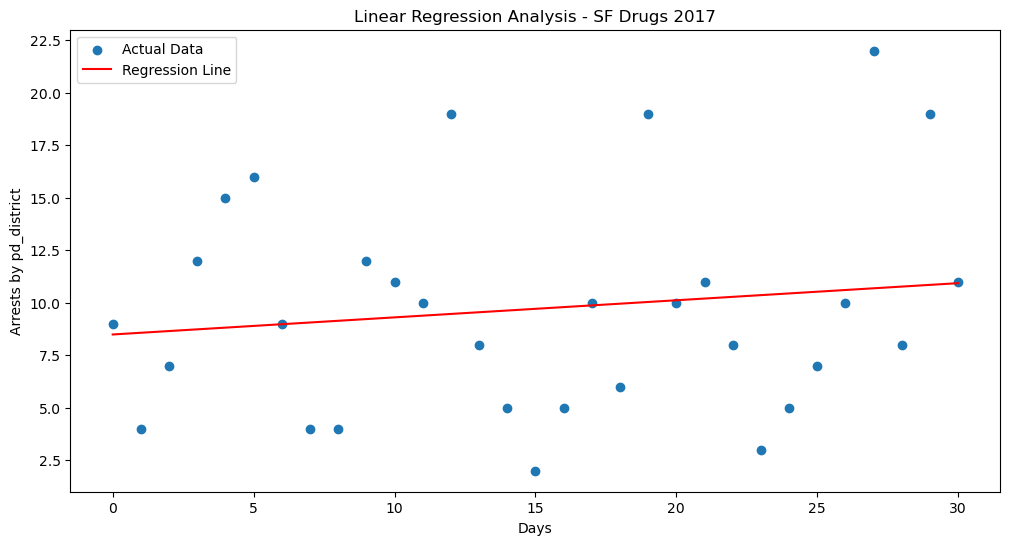

Slope: 0.08145161290322579
Intercept: 8.487903225806452
R-squared: 0.02055658552313395
P-value: 0.44161701016701926
Standard Error: 0.10440345603437069


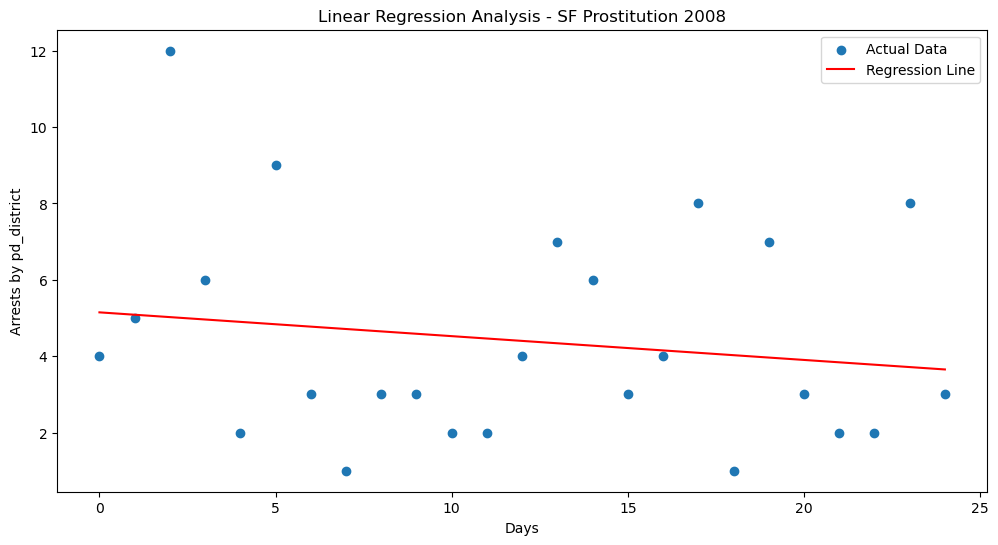

Slope: -0.062307692307692286
Intercept: 5.147692307692308
R-squared: 0.026845335515548262
P-value: 0.4338640032842397
Standard Error: 0.07822296340663838


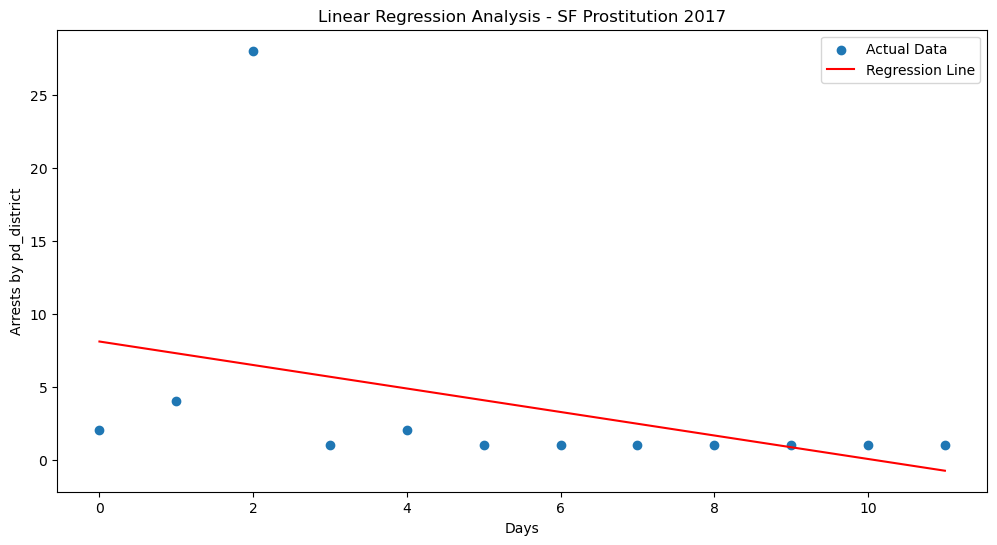

Slope: -0.8041958041958042
Intercept: 8.08974358974359
R-squared: 0.14126657456596362
P-value: 0.22856462126979055
Standard Error: 0.6270053976324638


In [74]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming you have the DataFrames
# NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

# NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

# SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

# SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

# Function to perform linear regression and plot the data
def perform_regression_plot(df, title):
    # Aggregate the data by day
    daily_counts = df.groupby('date')['pd_district'].count()

    # Create a DataFrame with the date and corresponding arrests count
    regression_df = pd.DataFrame({'date': daily_counts.index, 'arrests': daily_counts.values})

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(regression_df.index, regression_df['arrests'])

    # Predict the values using the regression equation
    regression_line = slope * regression_df.index + intercept

    # Plot the data and regression line
    plt.figure(figsize=(12, 6))
    plt.scatter(regression_df.index, regression_df['arrests'], label='Actual Data')
    plt.plot(regression_df.index, regression_line, color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel('Days')
    plt.ylabel('Arrests by pd_district')
    plt.title(f'Linear Regression Analysis - {title}')
    plt.legend()

    # Show the plot
    plt.show()

    # Display regression statistics
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")

# Perform regression analysis and plot for NY Drugs 2008
perform_regression_plot(ny_drugs_dec_2008, 'NY Drugs 2008')

# Perform regression analysis and plot for NY Drugs 2017
perform_regression_plot(ny_drugs_dec_2017, 'NY Drugs 2017')

# Perform regression analysis and plot for NY Prostitution 2008
perform_regression_plot(ny_prostitution_dec_2008, 'NY Prostitution 2008')

# Perform regression analysis and plot for NY Prostitution 2017
perform_regression_plot(ny_prostitution_dec_2017, 'NY Prostitution 2017')

# Perform regression analysis and plot for SF Drugs 2008
perform_regression_plot(sf_drugs_dec_2008, 'SF Drugs 2008')

# Perform regression analysis and plot for SF Drugs 2017
perform_regression_plot(sf_drugs_dec_2017, 'SF Drugs 2017')

# Perform regression analysis and plot for SF Prostitution 2008
perform_regression_plot(sf_prostitution_dec_2008, 'SF Prostitution 2008')

# Perform regression analysis and plot for SF Prostitution 2017
perform_regression_plot(sf_prostitution_dec_2017, 'SF Prostitution 2017')



## Outlier Detection:
- Identify and investigate any outliers in the data that could skew the analysis.
- Consider using statistical methods or visualizations to detect outliers.

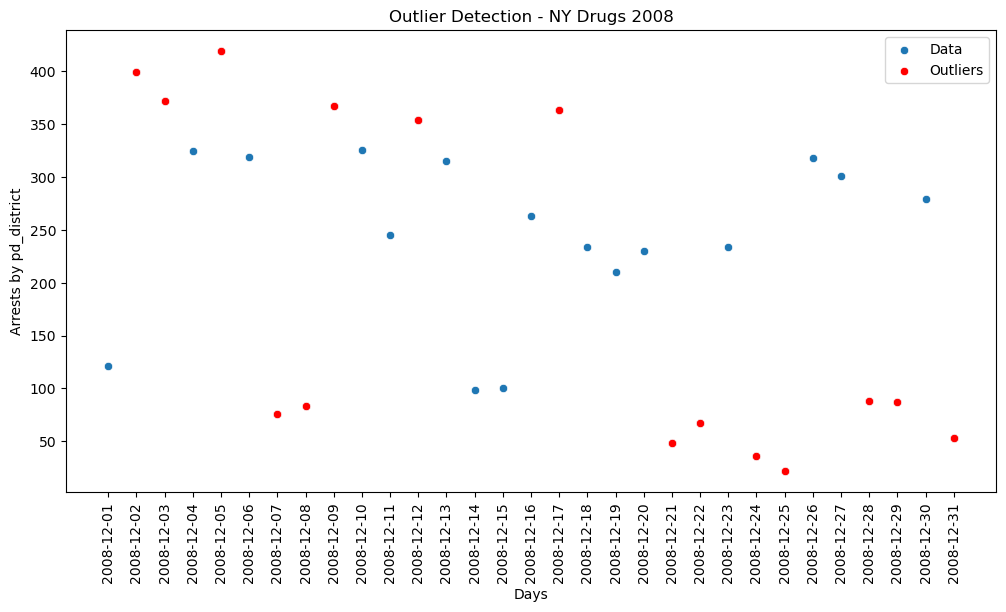

Outliers:
          date  arrests
1   2008-12-02      399
2   2008-12-03      372
4   2008-12-05      419
6   2008-12-07       76
7   2008-12-08       83
8   2008-12-09      367
11  2008-12-12      354
16  2008-12-17      363
20  2008-12-21       48
21  2008-12-22       67
23  2008-12-24       36
24  2008-12-25       22
27  2008-12-28       88
28  2008-12-29       87
30  2008-12-31       53


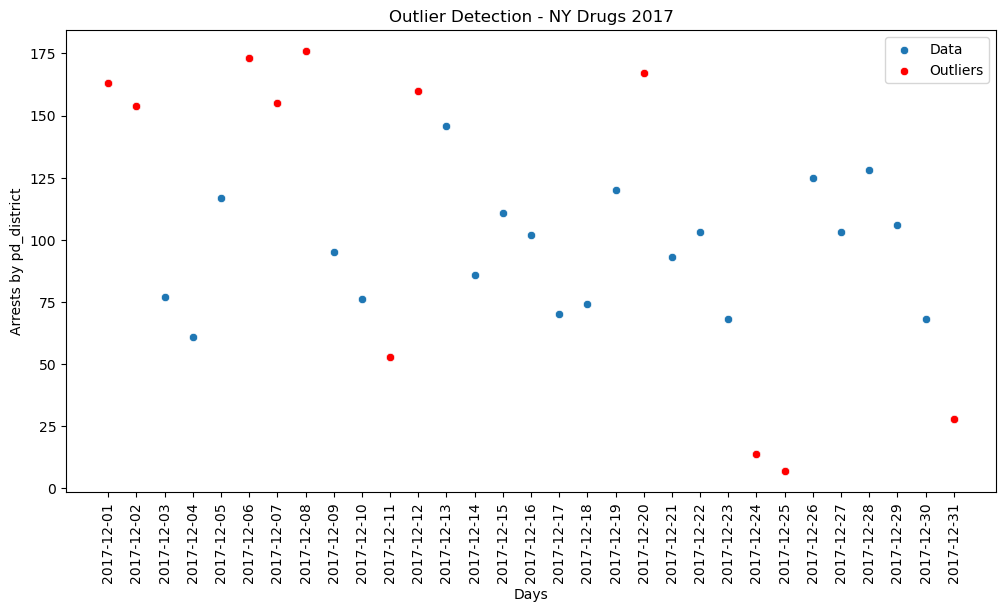

Outliers:
          date  arrests
0   2017-12-01      163
1   2017-12-02      154
5   2017-12-06      173
6   2017-12-07      155
7   2017-12-08      176
10  2017-12-11       53
11  2017-12-12      160
19  2017-12-20      167
23  2017-12-24       14
24  2017-12-25        7
30  2017-12-31       28


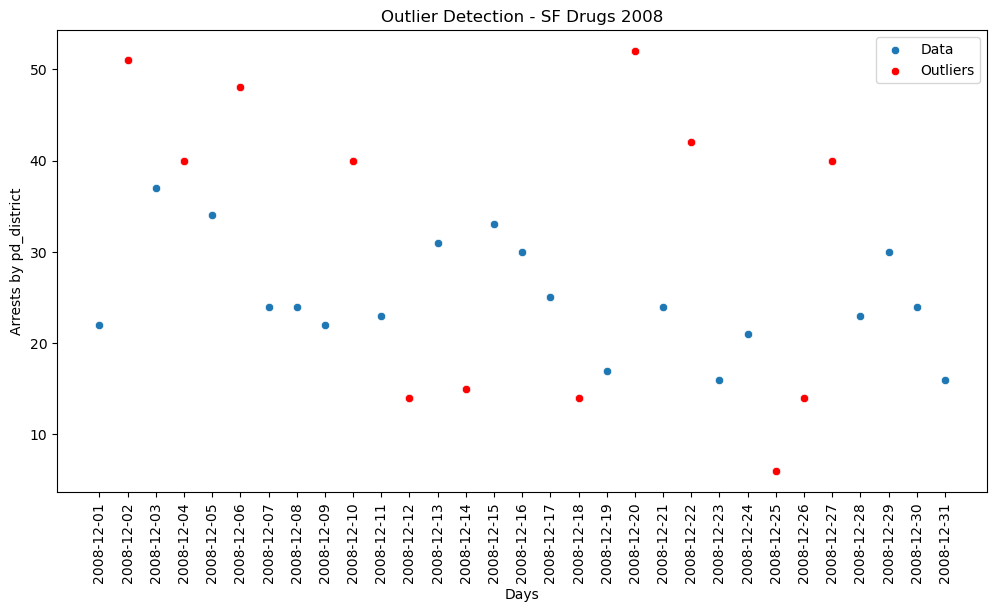

Outliers:
          date  arrests
1   2008-12-02       51
3   2008-12-04       40
5   2008-12-06       48
9   2008-12-10       40
11  2008-12-12       14
13  2008-12-14       15
17  2008-12-18       14
19  2008-12-20       52
21  2008-12-22       42
24  2008-12-25        6
25  2008-12-26       14
26  2008-12-27       40


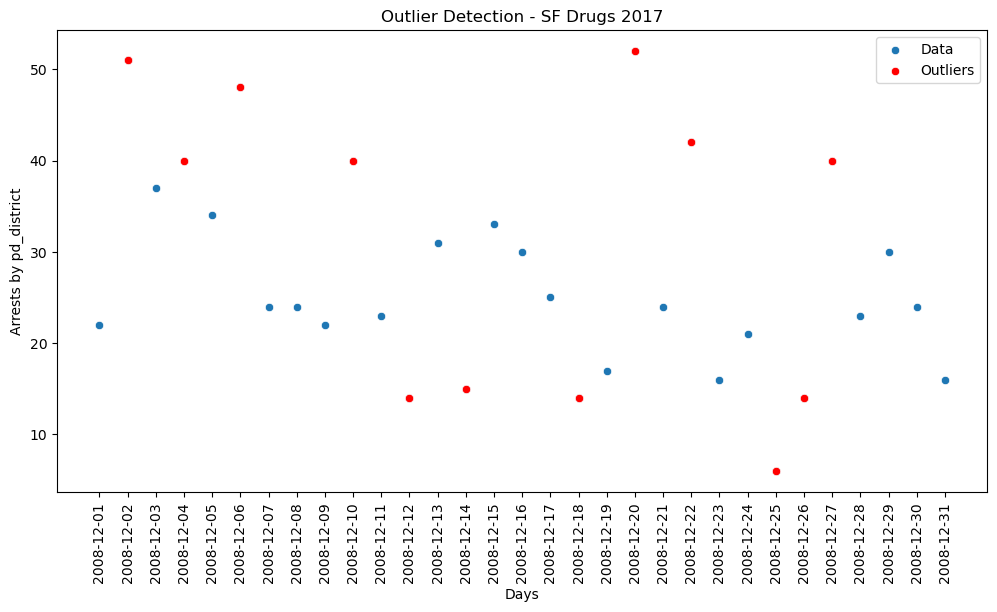

Outliers:
          date  arrests
1   2008-12-02       51
3   2008-12-04       40
5   2008-12-06       48
9   2008-12-10       40
11  2008-12-12       14
13  2008-12-14       15
17  2008-12-18       14
19  2008-12-20       52
21  2008-12-22       42
24  2008-12-25        6
25  2008-12-26       14
26  2008-12-27       40


In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrames
# NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

# NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

# SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

# SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

# Function to detect and visualize outliers using Z-scores
def detect_and_visualize_outliers(df, title):
    # Aggregate the data by day
    daily_counts = df.groupby('date')['pd_district'].count()

    # Create a DataFrame with the date and corresponding arrests count
    regression_df = pd.DataFrame({'date': daily_counts.index, 'arrests': daily_counts.values})

    # Calculate Z-scores
    z_scores = (regression_df['arrests'] - regression_df['arrests'].mean()) / regression_df['arrests'].std()

    # Set a threshold for Z-scores (e.g., 2 or -2)
    threshold = 1

    # Identify outliers
    outliers = regression_df[abs(z_scores) > threshold]

    # Plot the data with outliers highlighted
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='date', y='arrests', data=regression_df, label='Data')
    sns.scatterplot(x='date', y='arrests', data=outliers, color='red', label='Outliers')
    
    # Add labels and title
    plt.xticks(rotation=90)
    plt.xlabel('Days')
    plt.ylabel('Arrests by pd_district')
    plt.title(f'Outlier Detection - {title}')
    plt.legend()

    # Show the plot
    plt.show()

    # Display information about outliers
    print("Outliers:")
    print(outliers)

# Detect and visualize outliers for NY Drugs 2008
detect_and_visualize_outliers(ny_drugs_dec_2008, 'NY Drugs 2008')
detect_and_visualize_outliers(ny_drugs_dec_2017, 'NY Drugs 2017')
detect_and_visualize_outliers(sf_drugs_dec_2008, 'SF Drugs 2008')
detect_and_visualize_outliers(sf_drugs_dec_2008, 'SF Drugs 2017')
# Repeat for other scenarios...


# Outlier Detection Graph Explanation

## Scatter Plot (Blue Points):

- Each blue point on the graph represents the number of arrests on a specific day.
- The x-axis represents the days, and the y-axis represents the number of arrests by `pd_district`.

## Red Points (Outliers):

- Red points on the graph represent potential outliers.
- An outlier is a data point that significantly deviates from the overall pattern of the dataset.
- In this case, outliers are identified based on Z-scores. Z-scores measure how many standard deviations a data point is from the mean.
- If the absolute value of the Z-score is greater than a specified threshold (in this case, 2), the data point is considered an outlier.

## Threshold Line:

- While the code doesn't explicitly draw a threshold line, the threshold is set at Z-score values of 2 or -2.
- Any data point beyond this threshold is considered a potential outlier.

## Title and Labels:

- The title of the graph indicates that it is an "Outlier Detection" plot for a specific scenario (e.g., "Outlier Detection - NY Drugs 2008").
- The x-axis is labeled as "Days," representing the timeline.
- The y-axis is labeled as "Arrests by pd_district," representing the number of arrests.

## Legend:

- The legend in the upper right corner distinguishes between regular data points (blue) and potential outliers (red).

By visualizing the potential outliers, this graph helps to identify days with arrest counts that significantly deviate from the usual pattern. Outliers may suggest unusual events or circumstances that warrant further investigation. Keep in mind that the effectiveness of the outlier detection method depends on the distribution and characteristics of your data. Adjust the threshold or explore other outlier detection techniques based on the specifics of your analysis.


In [ ]:
#-------

In [82]:
pip install GeoJSON

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for GeoJSON from https://files.pythonhosted.org/packages/8e/1b/4f57660aa148d3e3043d048b7e1ab87dfeb85204d0fdb5b4e19c08202162/geojson-3.1.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


Error processing line 15 of C:\Users\mikea\AppData\Roaming\Python\Python311\site-packages\load_dotenv.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 186, in addpackage
    File "<string>", line 1, in <module>
    File "C:\Users\mikea\AppData\Roaming\Python\Python311\site-packages\load_dotenv.py", line 17, in <module>
      from dotenv import load_dotenv
  ModuleNotFoundError: No module named 'dotenv'

Remainder of file ignored


In [84]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/e3/23/00912e3236306ec52a06f95a08918cbb54f900419951726a20a8783a8507/geopandas-0.14.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.1 kB 330.3 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.1 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 434.8 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342

Error processing line 15 of C:\Users\mikea\AppData\Roaming\Python\Python311\site-packages\load_dotenv.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 186, in addpackage
    File "<string>", line 1, in <module>
    File "C:\Users\mikea\AppData\Roaming\Python\Python311\site-packages\load_dotenv.py", line 17, in <module>
      from dotenv import load_dotenv
  ModuleNotFoundError: No module named 'dotenv'

Remainder of file ignored
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [86]:
pip install contextily

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/17/19/1051cd673ea58286b5148bf5c6eb42bdadb0b0b335c601cd5cea549aa17b/contextily-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/b3/0f/e7f21b87636029955ab4e0e81027dc491d99c2b6215e68c6d8f38e5291b3/rasterio-1.3.9-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------------------

Error processing line 15 of C:\Users\mikea\AppData\Roaming\Python\Python311\site-packages\load_dotenv.pth:

  Traceback (most recent call last):
    File "<frozen site>", line 186, in addpackage
    File "<string>", line 1, in <module>
    File "C:\Users\mikea\AppData\Roaming\Python\Python311\site-packages\load_dotenv.py", line 17, in <module>
      from dotenv import load_dotenv
  ModuleNotFoundError: No module named 'dotenv'

Remainder of file ignored
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import contextily as ctx

In [ ]:


# Load your geospatial data

# NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

# NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

# SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

# SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')



In [92]:
# Read the CSV file
df = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')

# Create a GeoDataFrame by converting latitude and longitude to a Point geometry
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Optionally, set the coordinate reference system (CRS) if needed
# For example, using WGS84 (epsg:4326)
gdf.crs = "EPSG:4326"

# Display the GeoDataFrame
print(gdf.head())

KeyError: 'longitude'

In [ ]:
# This should be a GeoDataFrame with geometry column containing Point geometries
gdf = gpd.read_file('/Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv.geojson')  # replace with your file path

# Optional: Normalize your data if you have a specific column for intensity

# gdf['intensity'] = normalize(gdf[['your_intensity_column']])

# Create a base map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=gdf['intensity'] * 1000, alpha=0.5, color='red')  # Adjust markersize and color

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Set plot titles and labels
ax.set_title('Hotspot Chart')

## Comparative Analysis:
- Compare incident rates across different incident categories, cities, and years.
- Identify any significant differences or similarities.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the DataFrames
# NY drugs
ny_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2008.csv')
ny_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_drugs_dec_2017.csv')

# NY prostitution
ny_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2008.csv')
ny_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/ny_prostitution_dec_2017.csv')

# SF drugs
sf_drugs_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2008.csv')
sf_drugs_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_drugs_2017.csv')

# SF prostitution
sf_prostitution_dec_2008 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2008.csv')
sf_prostitution_dec_2017 = pd.read_csv('./Cleaned_Resources_NY_SanFran/SanFran_prostitution_2017.csv')

# GPT recommended Methods for Comprehensive Analysis of Four DataFrames

## Descriptive Statistics:
- Calculate summary statistics (mean, median, mode, standard deviation, etc.) for key variables such as incident counts, population, and other relevant metrics.
- Use box plots to visualize the distribution of incident counts.

## Temporal Analysis:
- Explore trends over time by plotting incident counts against dates.
- Use line charts or bar charts to visualize monthly or yearly variations.
- Identify any significant spikes or declines and investigate potential causes.

## Geospatial Analysis:
- If the data includes location information, use geospatial visualizations (maps) to identify hotspots or patterns.
- Consider clustering analysis to identify regions with higher incident concentrations.

## Correlation and Regression:
- Perform correlation analysis to identify relationships between different incident categories.
- Conduct regression analysis to explore the impact of population or other variables on incident counts.

## Outlier Detection:
- Identify and investigate any outliers in the data that could skew the analysis.
- Consider using statistical methods or visualizations to detect outliers.

## Comparative Analysis:
- Compare incident rates across different incident categories, cities, and years.
- Identify any significant differences or similarities.

## Demographic Analysis:
- If available, consider incorporating demographic data to analyze the impact of demographics on incident rates.
- Explore whether certain demographics correlate with higher or lower incident rates.

## Time Series Analysis:
- Use time series analysis techniques to detect patterns, seasonality, or cyclicality in the data.
- Apply forecasting models to predict future incident counts.

## Qualitative Analysis:
- Consider incorporating qualitative data or information to provide context to quantitative findings.
- Interviews, reports, or news articles may offer insights into specific incidents or trends.

## Interactive Visualizations:
- Use interactive visualization tools (such as Plotly or Bokeh) to create dynamic dashboards that allow users to explore the data interactively.

**Note:** Adapt your analysis based on the specific characteristics of your datasets and the objectives of your investigation. Combining multiple methods will provide a comprehensive understanding of the patterns and trends within the data.
